**abby using rajvi's code using steph's code...lol**

In [26]:
from api.mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon
from pyproj import Geod
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

In [2]:
branchRadii = gpd.read_file('../data/clean/branches.csv')
populationDemographics = pd.read_csv('../data/clean/population_demographics.csv')

In [3]:
api = MapboxAPI()

In [4]:
branchRadii.head()

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED,geometry
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0,None
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0,None
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0,None
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0,None
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0,None


In [5]:
populationDemographics.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."


In [6]:
branchRadii.crs = 'EPSG:3435'

In [7]:
branchRadii[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in branchRadii['LOCATION']]
branchRadii.loc[:, 'LATITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LATITUDE'])
branchRadii.loc[:, 'LONGITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LONGITUDE'])
branchRadii.head()

#for i in range(branchRadii.shape[0]):
#    api_response =  api.get_data((branchRadii.loc[i,'LATITUDE'],branchRadii.loc[i,'LONGITUDE']), 5)
#    branchRadii.loc[i,'geometry'] = shape(api_response)

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED,geometry,LATITUDE,LONGITUDE
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0,None,41.975579,-87.713613
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0,None,41.657198,-87.598838
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0,None,41.801108,-87.726484
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0,None,41.889173,-87.765820
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0,None,41.953123,-87.779285


In [8]:
#api_response = api.get_data((branchRadii.loc[0,'LATITUDE'],branchRadii.loc[0,'LONGITUDE']), 5)
#branchRadii.loc[0,'geometry'] = shape(api_response)
#branchRadii.loc[0,'geometry']

In [9]:
censusTracts = populationDemographics[['geoid','geometry','qualifying name', 'current land area (sq. m)', 'current water area (sq. m)', ]]
censusTracts.head()

,geoid,geometry,qualifying name,current land area (sq. m),current water area (sq. m)
0,17031823303,"POLYGON ((-87.720963 41.683952, -87.720304 41....","Census Tract 8233.03, Cook County, Illinois",2008920,0
1,17031823304,MULTIPOLYGON (((-87.72003618903081 41.68396731...,"Census Tract 8233.04, Cook County, Illinois",3553267,0
2,17031740400,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...","Census Tract 7404, Cook County, Illinois",2838804,0
3,17031740300,"POLYGON ((-87.720431 41.698569, -87.720066 41....","Census Tract 7403, Cook County, Illinois",1320728,0
4,17031822802,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...","Census Tract 8228.02, Cook County, Illinois",1305003,0


In [10]:
branchLocsOnly=branchRadii[['BRANCH','LOCATION']]
branchLocsOnly.head()

,BRANCH,LOCATION
0,Albany Park,"(41.97557881655979, -87.71361314512697)"
1,Altgeld,"(41.65719847558056, -87.59883829075173)"
2,Archer Heights,"(41.80110836194246, -87.72648385568911)"
3,Austin,"(41.88917312206642, -87.7658203582574)"
4,Austin-Irving,"(41.95312267684315, -87.77928489355646)"


In [11]:
censusTracts['geometry'] = censusTracts['geometry'].apply(wkt.loads)
censusTracts = gpd.GeoDataFrame(censusTracts, crs="EPSG:3435", geometry=censusTracts['geometry'])
censusTracts.head()

/tmp/ipykernel_1601711/3160309604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusTracts['geometry'] = censusTracts['geometry'].apply(wkt.loads)


,geoid,geometry,qualifying name,current land area (sq. m),current water area (sq. m)
0,17031823303,"POLYGON ((-87.721 41.684, -87.720 41.684, -87....","Census Tract 8233.03, Cook County, Illinois",2008920,0
1,17031823304,"MULTIPOLYGON (((-87.720 41.684, -87.720 41.684...","Census Tract 8233.04, Cook County, Illinois",3553267,0
2,17031740400,"POLYGON ((-87.720 41.691, -87.719 41.691, -87....","Census Tract 7404, Cook County, Illinois",2838804,0
3,17031740300,"POLYGON ((-87.720 41.699, -87.720 41.699, -87....","Census Tract 7403, Cook County, Illinois",1320728,0
4,17031822802,"MULTIPOLYGON (((-87.721 41.702, -87.721 41.702...","Census Tract 8228.02, Cook County, Illinois",1305003,0


In [12]:
branchLocsOnly.crs = 'EPSG:3435'

In [13]:
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')
branchLocsOnly.head()

/tmp/ipykernel_1601711/3571578924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_1601711/3571578924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


,BRANCH,Latitude,Longitude
0,Albany Park,41.975579,-87.713613
1,Altgeld,41.657198,-87.598838
2,Archer Heights,41.801108,-87.726484
3,Austin,41.889173,-87.765820
4,Austin-Irving,41.953123,-87.779285


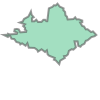

In [14]:
api_response = api.get_data((branchRadii.loc[0,'LATITUDE'],branchRadii.loc[0,'LONGITUDE']), 5)
branchRadii.loc[0,'geometry'] = shape(api_response)
branchRadii.loc[0,'geometry']

In [2]:
#censusTracts = gpd.GeoDataFrame(
 #   censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
  #  geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
   # crs="epsg:3435",
    #)

branchLocsOnly = gpd.GeoDataFrame(
     branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:3435")

fig, ax = plt.subplots(1, figsize=(10, 10))
base = censusTracts.plot(ax=ax, color='white', edgecolor='black')
ax.axis('off')

branchRadii.plot(ax=base, alpha = .5)
branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=5);

NameError: name 'gpd' is not defined

In [16]:
albanyPark = gpd.GeoDataFrame(columns=['Census Tract','geometry'], crs="EPSG:3435")
albanyPark.head()

,Census Tract,geometry


In [17]:
areaCalculations = gpd.GeoDataFrame(columns=['Census Tract','geometry', 'area'], crs="EPSG:3435")
areaCalculations.head()

,Census Tract,geometry,area


In [18]:
albanyPark.reset_index(inplace = True)
albanyPark.head()

,index,Census Tract,geometry


In [19]:
# for loop to make dataframe of overlapping census tracts with the names of each census tract and polygon of area covered
# for loop also adds to new data frame which is collecting the name and geometry of the entire census tract that is partially or fully covered by
# the radius

for index, row in censusTracts.iterrows():
    if ((branchRadii.intersection(row['geometry']))[0]).is_empty:
        empty=[]
        empty.append("none")
    else:
        temp = pd.DataFrame({"Census Tract": row['geoid'],"geometry": [(branchRadii.intersection(row['geometry'])[0])]}, index=[0])
        albanyPark=pd.concat([albanyPark,temp])
        areaTemp = pd.DataFrame({"Census Tract": row['geoid'],"geometry": [(row['geometry'])]})
        areaCalculations = pd.concat([areaCalculations, areaTemp])
        

/opt/tljh/user/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/tljh/user/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersectio

In [20]:
albanyPark.crs = 'EPSG:3435'
type(albanyPark)

geopandas.geodataframe.GeoDataFrame

In [21]:
albanyPark.reset_index(inplace = True)
albanyPark

,level_0,index,Census Tract,geometry
0,0,NaN,17031140800,"POLYGON ((-87.705 41.967, -87.706 41.968, -87...."
1,0,NaN,17031160501,"POLYGON ((-87.712 41.961, -87.713 41.959, -87...."
2,0,NaN,17031140702,"POLYGON ((-87.715 41.961, -87.716 41.962, -87...."
3,0,NaN,17031140601,"POLYGON ((-87.725 41.966, -87.725 41.967, -87...."
4,0,NaN,17031140602,"POLYGON ((-87.718 41.964, -87.719 41.965, -87...."
5,0,NaN,17031140701,"POLYGON ((-87.717 41.968, -87.717 41.968, -87...."
6,0,NaN,17031140301,"POLYGON ((-87.728 41.968, -87.728 41.968, -87...."
7,0,NaN,17031140200,"POLYGON ((-87.717 41.973, -87.717 41.972, -87...."
8,0,NaN,17031140100,"POLYGON ((-87.704 41.972, -87.703 41.969, -87...."
9,0,NaN,17031140302,"POLYGON ((-87.728 41.976, -87.727 41.976, -87...."


In [22]:
albanyPark=albanyPark.drop(['level_0', 'index'], axis=1)
albanyPark

,Census Tract,geometry
0,17031140800,"POLYGON ((-87.705 41.967, -87.706 41.968, -87...."
1,17031160501,"POLYGON ((-87.712 41.961, -87.713 41.959, -87...."
2,17031140702,"POLYGON ((-87.715 41.961, -87.716 41.962, -87...."
3,17031140601,"POLYGON ((-87.725 41.966, -87.725 41.967, -87...."
4,17031140602,"POLYGON ((-87.718 41.964, -87.719 41.965, -87...."
5,17031140701,"POLYGON ((-87.717 41.968, -87.717 41.968, -87...."
6,17031140301,"POLYGON ((-87.728 41.968, -87.728 41.968, -87...."
7,17031140200,"POLYGON ((-87.717 41.973, -87.717 41.972, -87...."
8,17031140100,"POLYGON ((-87.704 41.972, -87.703 41.969, -87...."
9,17031140302,"POLYGON ((-87.728 41.976, -87.727 41.976, -87...."


In [23]:
albanyPark["Area Within Radius"] = albanyPark['geometry'].area/ (1.076*pow(10,7))
albanyPark

,Census Tract,geometry,Area Within Radius
0,17031140800,"POLYGON ((-87.705 41.967, -87.706 41.968, -87....",7.994043e-13
1,17031160501,"POLYGON ((-87.712 41.961, -87.713 41.959, -87....",2.424134e-13
2,17031140702,"POLYGON ((-87.715 41.961, -87.716 41.962, -87....",3.306647e-12
3,17031140601,"POLYGON ((-87.725 41.966, -87.725 41.967, -87....",2.742645e-13
4,17031140602,"POLYGON ((-87.718 41.964, -87.719 41.965, -87....",1.125628e-12
5,17031140701,"POLYGON ((-87.717 41.968, -87.717 41.968, -87....",2.304726e-12
6,17031140301,"POLYGON ((-87.728 41.968, -87.728 41.968, -87....",1.654403e-12
7,17031140200,"POLYGON ((-87.717 41.973, -87.717 41.972, -87....",3.981813e-12
8,17031140100,"POLYGON ((-87.704 41.972, -87.703 41.969, -87....",2.562162e-12
9,17031140302,"POLYGON ((-87.728 41.976, -87.727 41.976, -87....",4.186496e-12


In [24]:



def tractArea(row):
    for index, tracts in censusTracts.iterrows():
        if row['Census Tract'] == tracts['geoid']:
            return (tracts['current land area (sq. m)']+tracts['current water area (sq. m)'])/ 10**6
            #return tracts.area/ 10**6

albanyPark['Tract Area']= albanyPark.apply(tractArea, axis=1)
albanyPark['Percent Overlap'] = albanyPark['Area Within Radius']/albanyPark['Tract Area']*100
albanyPark

,Census Tract,geometry,Area Within Radius,Tract Area,Percent Overlap
0,17031140800,"POLYGON ((-87.705 41.967, -87.706 41.968, -87....",7.994043e-13,0.725873,1.101300e-10
1,17031160501,"POLYGON ((-87.712 41.961, -87.713 41.959, -87....",2.424134e-13,0.345248,7.021428e-11
2,17031140702,"POLYGON ((-87.715 41.961, -87.716 41.962, -87....",3.306647e-12,0.427095,7.742182e-10
3,17031140601,"POLYGON ((-87.725 41.966, -87.725 41.967, -87....",2.742645e-13,0.272123,1.007869e-10
4,17031140602,"POLYGON ((-87.718 41.964, -87.719 41.965, -87....",1.125628e-12,0.384380,2.928425e-10
5,17031140701,"POLYGON ((-87.717 41.968, -87.717 41.968, -87....",2.304726e-12,0.228328,1.009392e-09
6,17031140301,"POLYGON ((-87.728 41.968, -87.728 41.968, -87....",1.654403e-12,0.164129,1.007989e-09
7,17031140200,"POLYGON ((-87.717 41.973, -87.717 41.972, -87....",3.981813e-12,0.394455,1.009447e-09
8,17031140100,"POLYGON ((-87.704 41.972, -87.703 41.969, -87....",2.562162e-12,0.287983,8.896922e-10
9,17031140302,"POLYGON ((-87.728 41.976, -87.727 41.976, -87....",4.186496e-12,0.414720,1.009475e-09


In [25]:
areaCalculations = gpd.GeoDataFrame(areaCalculations, crs="epsg:32633")
areaCalculations.reset_index(inplace = True)
areaCalculations=areaCalculations.drop(columns = ['index'])
areaCalculations['area'] = areaCalculations['geometry'].area/10**6
areaCalculations

ValueError: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. 

In [ ]:
albanyPark['Percent Overlap'] = albanyPark['Area Within Radius']/albanyPark['Tract Area']*100
albanyPark['Calculated Area'] = areaCalculations['area']
albanyPark['Percent Overlap with Calculated Area'] = albanyPark['Area Within Radius']/albanyPark['Calculated Area']*100
albanyPark

In [ ]:
total=0
for index, row in albanyPark.iterrows():
    total = total+row['Area Within Radius']
        
print(total)